In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append('../')

from fastai.conv_learner import *

In [15]:
PATH = './../data/planet/'
!ls './../data/planet/'

models
test-jpg
test-jpg.tar.7z
tmp
train-jpg
train-jpg.tar.7z
train_v2.csv


In [6]:
from fastai.plots import *

In [7]:
def get_1st(path):
    return glob(f'{path}/*.*')[0]

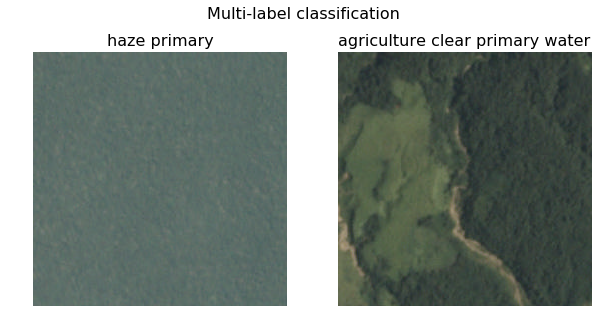

In [12]:
paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles = ["haze primary", "agriculture clear primary water"]
plots_from_files(imspaths=paths, titles=titles, maintitle="Multi-label classification")

In [16]:
from planet import f2

metrics = [f2]
f_model = resnet34

In [ ]:
learner.summary()

In [17]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [20]:
def get_data(sz):
    tfms = tfms_from_model(f_model=f_model, sz=sz, aug_tfms=transforms_top_down, 
                           max_zoom=1.05)
    return ImageClassifierData.from_csv(path=PATH, folder='train-jpg', 
                                        csv_fname=label_csv, tfms=tfms,
                                        suffix='.jpg', val_idxs=val_idxs, 
                                        test_name='test-jpg')

In [21]:
data = get_data(256)

In [22]:
x, y = next(iter(data.val_dl))

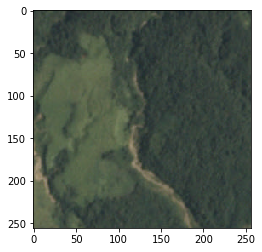

In [30]:
plt.imshow(data.val_ds.denorm(to_np(x))[0])

## 1st train

In [31]:
sz = 64
data = get_data(sz)
data = data.resize(int(sz*1.3), 'tmp')

In [33]:
learner = ConvLearner.pretrained(f=f_model, data=data, metrics=metrics)

epoch      trn_loss   val_loss   f2                                                                                      
    0      0.226052   0.320542   0.815864  



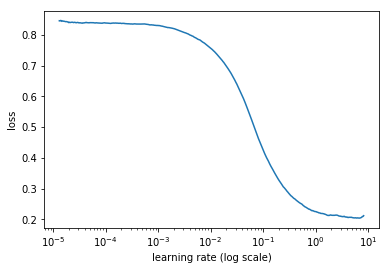

In [34]:
lrf = learner.lr_find()
learner.sched.plot()

In [36]:
lr = 2e-1
learner.fit(lrs=lr, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                      
    0      0.132478   0.121368   0.894828  
    1      0.131021   0.121598   0.895503                                                                                
    2      0.130513   0.120301   0.896534                                                                                
    3      0.131548   0.120906   0.896866                                                                                
    4      0.133898   0.120016   0.897663                                                                                
    5      0.127895   0.118915   0.89859                                                                                 
    6      0.129621   0.118799   0.898129                                                                                



[array([0.1188]), 0.8981291770627304]

In [37]:
lrs = np.array([lr/9, lr/3, lr])
learner.unfreeze()
learner.fit(lrs=lrs, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                      
    0      0.122062   0.108136   0.910106  
    1      0.114204   0.104648   0.909209                                                                                
    2      0.108522   0.100239   0.916573                                                                                
    3      0.11153    0.103646   0.914208                                                                                
    4      0.108787   0.099092   0.917155                                                                                
    5      0.09905    0.096821   0.919251                                                                                
    6      0.097621   0.096059   0.919341                                                                                



[array([0.09606]), 0.9193410179007526]

In [38]:
learner.save(f'{sz}')

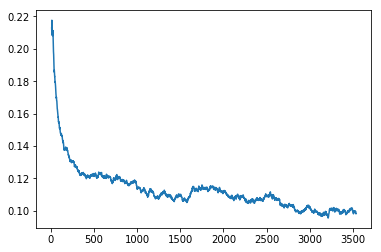

In [39]:
learner.sched.plot_loss()

## 2nd train

In [40]:
sz = 128

learner.set_data(data=get_data(sz=sz))
learner.freeze()
learner.fit(lrs=lr, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                      
    0      0.09625    0.095006   0.918087  
    1      0.096849   0.093182   0.919801                                                                                
    2      0.097338   0.093734   0.918352                                                                                
    3      0.097165   0.093396   0.918409                                                                                
    4      0.097273   0.09154    0.921459                                                                                
    5      0.097133   0.091209   0.921904                                                                                
    6      0.093604   0.091734   0.920825                                                                                



[array([0.09173]), 0.9208247776151461]

In [41]:
learner.unfreeze()
learner.fit(lrs=lrs, n_cycle=3, cycle_len=1, cycle_mult=2)
learner.save(f'{sz}')

epoch      trn_loss   val_loss   f2                                                                                      
    0      0.092295   0.08653    0.927326  
    1      0.091076   0.086788   0.927797                                                                                
    2      0.090185   0.085094   0.929223                                                                                
    3      0.092491   0.08828    0.924013                                                                                
    4      0.088723   0.085557   0.92935                                                                                 
    5      0.084619   0.084341   0.930456                                                                                
    6      0.081581   0.083802   0.930373                                                                                



## 3rd train

In [42]:
sz = 256
learner.set_data(data=get_data(sz=sz))
learner.freeze()
learner.fit(lrs=lrs, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                      
    0      0.089737   0.087988   0.925734  
    1      0.089241   0.087644   0.926106                                                                                
    2      0.091895   0.086994   0.927299                                                                                
    3      0.089683   0.086373   0.928728                                                                                
    4      0.086646   0.085967   0.928769                                                                                
    5      0.08758    0.085995   0.928705                                                                                
    6      0.089689   0.085818   0.928975                                                                                



[array([0.08582]), 0.9289746632376421]

In [43]:
learner.unfreeze()
learner.fit(lrs=lrs, n_cycle=3, cycle_len=1, cycle_mult=2)
learner.save(f'{sz}')

  0%|                                                                                            | 0/506 [00:00<?, ?it/s]

RuntimeError: cuda runtime error (2) : out of memory at c:\anaconda2\conda-bld\pytorch_1519501749874\work\torch\lib\thc\generic/THCStorage.cu:58

## test with augmentation

In [ ]:
# predictions
multi_preds, y = learner.TTA()
preds = np.mean(multi_preds, 0)

In [ ]:
# accuracy
f2(preds, y)